# Ridge and LASSO Regression

From our regression lectures, you would recall that linear models follows the form **$y = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + ... + \beta_{n}x_{n}$** ,and our objective was to minimize the Sum of the square errors.
If you would also recall, in our multivariate regression problems we applied manual techniques as well as Forward, Backward and bidirectional Stepwise methods for features selection. We then finally used the cp techique to get our final features.These methods of deriving features can be considered as Statistical learning methods.<br>

Lets us now look at some machine learning techniques called **regularization**, all the processes described above are likened to regularization. There are two regularization methods, namely **LASSO and Ridge**. We will deep dive into these two concepts and their application. To obtain an adequated model, we will apply what is known as a regularization parameter or shrinkage penalty ($\lambda$) along side the minimization RSS (Actual value - predicted value).

The larger the value of **lamda** the influence of the predictor shrinks more now the main question to ask is what should the value of lamda be?. The **lamda** could be implemented in two types of regularization methods, **LASSO and Ridge regresion**. The ridge regression retaines all the predictors but could shrink all the coefficients to a very small number if needed and its believed to handle cases of muticollinearity, while the LASSO could remove some predictors entirly by shrinking the coefficients to zero. For this feature of LASSO, it is refered as a features selection method. Generally speaking both ridge and lasso can be expressed as **RSS + λ(normalized coefficients)**. More on this later

In a linear model where the relationship between the response and the predictors is close to linear, the least squares estimates will have low bias but may have high variance.<br>
Reference to bias-variance trade-off:<br>
[Bias-Variance Trade off](https://en.wikipedia.org/wiki/Bias–variance_tradeoff)

###### Note that if lambda is equal to zero, then our model is equivalent to OLS (Ordinary Least Square) as it cancels out the normalization term

**OLS Method**
$$RSS = \sum\limits_{i=1}^{n}(y_i - \beta_{0} - \sum\limits_{j=1}^{p} \beta_{j}x_{ij})^2$$

>**Ridge regression**<br>
The normalization term in ridge regression is the sum of the squared weights, referred to as an L2-norm. Our model is trying to minimize $RSS + \lambda \sum\limits_{j=1}^{p} \beta^2_{j}$ or simply put $RSS + \lambda(\sum \beta^2_{j})$. As lambda increases, the coefficients shrink toward zero but do not ever become zero.
$$Ridge = RSS + \lambda \sum\limits_{j=1}^{p} \beta^2_{j}$$

>**Pros**: Improved predictive accuracy

>**Cons**:
    Interpretation and communication becomes an issue

>**Least Absolute Shrinkage and Selection (LASSO):**<br>
LASSO applies the L1-norm instead of the L2-norm as in ridge regression,
which is the sum of the absolute value of the feature weights and thus minimizes
$RSS + \lambda(\sum |\beta^2_{j}|$. This shrinkage penalty will indeed force a feature weight to
zero
$$Lasso = RSS + \lambda\sum\limits_{j=1}^{p} |\beta^2_{j}|$$

>**Very important points to note**<br>
We will be using the glmnet package both lasso and ridge can be implemented or mixed using the mixing parameter called **Alpha**, when **Alpha value is set to 0,the model becomes Ridge**, if **Alpha is set to 1, the model becomes LASSO** and if **Alpha value lies between 0 and 1, we have what is called an ElasticNet model**

## Hands-On Session
In this practical application session, we will be looking back at the water dataset when we looked at multivariate linear regression, for reference please have a look at "CFT-DataScience2"<br>For information about the dataset type **help(water)**

In [2]:
# Load the required library that has the dataset we require for this lab session
library(alr3)
library(glmnet)
#library(caret)
#'%ni%' <- Negate('%in%')

Warning message:
"package 'glmnet' was built under R version 3.5.3"Loading required package: Matrix
Loading required package: foreach
Warning message:
"package 'foreach' was built under R version 3.5.2"Loaded glmnet 2.0-18



In [3]:
# Let's load the dataset from the alr3 packages. Ensure this packages is installed and loaded
data(water)
attach(water)
# The regressand for this project is BSAAM

In [4]:
head(water)

Year,APMAM,APSAB,APSLAKE,OPBPC,OPRC,OPSLAKE,BSAAM
1948,9.13,3.58,3.91,4.10,7.43,6.47,54235
1949,5.28,4.82,5.20,7.55,11.11,10.26,67567
1950,4.20,3.77,3.67,9.52,12.20,11.35,66161
1951,4.60,4.46,3.93,11.14,15.15,11.13,68094
1952,7.15,4.99,4.88,16.34,20.05,22.81,107080
1953,9.70,5.65,4.91,8.88,8.15,7.41,67594


In [5]:
# From the output above, it's observed that the first column holds a date value, 
# this is not required for regression problems
# let's remove this field with the syntax below and store it in the object 'calif.water'
calif.water <- water[, -1]

In [6]:
# Let's view our data again to ensure the data field has been removed
str(calif.water)

'data.frame':	43 obs. of  7 variables:
 $ APMAM  : num  9.13 5.28 4.2 4.6 7.15 9.7 5.02 6.7 10.5 9.1 ...
 $ APSAB  : num  3.58 4.82 3.77 4.46 4.99 5.65 1.45 7.44 5.85 6.13 ...
 $ APSLAKE: num  3.91 5.2 3.67 3.93 4.88 4.91 1.77 6.51 3.38 4.08 ...
 $ OPBPC  : num  4.1 7.55 9.52 11.14 16.34 ...
 $ OPRC   : num  7.43 11.11 12.2 15.15 20.05 ...
 $ OPSLAKE: num  6.47 10.26 11.35 11.13 22.81 ...
 $ BSAAM  : int  54235 67567 66161 68094 107080 67594 65356 67909 92715 70024 ...


In [7]:
summary(calif.water)

     APMAM            APSAB           APSLAKE          OPBPC       
 Min.   : 2.700   Min.   : 1.450   Min.   : 1.77   Min.   : 4.050  
 1st Qu.: 4.975   1st Qu.: 3.390   1st Qu.: 3.36   1st Qu.: 7.975  
 Median : 7.080   Median : 4.460   Median : 4.62   Median : 9.550  
 Mean   : 7.323   Mean   : 4.652   Mean   : 4.93   Mean   :12.836  
 3rd Qu.: 9.115   3rd Qu.: 5.685   3rd Qu.: 5.83   3rd Qu.:16.545  
 Max.   :18.080   Max.   :11.960   Max.   :13.02   Max.   :43.370  
      OPRC           OPSLAKE           BSAAM       
 Min.   : 4.350   Min.   : 4.600   Min.   : 41785  
 1st Qu.: 7.875   1st Qu.: 8.705   1st Qu.: 59857  
 Median :11.110   Median :12.140   Median : 69177  
 Mean   :12.002   Mean   :13.522   Mean   : 77756  
 3rd Qu.:14.975   3rd Qu.:16.920   3rd Qu.: 92206  
 Max.   :24.850   Max.   :33.070   Max.   :146345  

In [8]:
# Let us convert our data to a correlation matrix, so we could identify correlated features
calif.cor <- cor(calif.water)
calif.cor # View the output

,APMAM,APSAB,APSLAKE,OPBPC,OPRC,OPSLAKE,BSAAM
APMAM,1.0000000,0.82768637,0.81607595,0.12238567,0.1544155,0.10754212,0.2385695
APSAB,0.8276864,1.00000000,0.90030474,0.03954211,0.1056396,0.02961175,0.1832950
APSLAKE,0.8160760,0.90030474,1.00000000,0.09344773,0.1063836,0.10058669,0.2493409
OPBPC,0.1223857,0.03954211,0.09344773,1.00000000,0.8647073,0.94334741,0.8857478
OPRC,0.1544155,0.10563959,0.10638359,0.86470733,1.0000000,0.91914467,0.9196270
OPSLAKE,0.1075421,0.02961175,0.10058669,0.94334741,0.9191447,1.00000000,0.9384360
BSAAM,0.2385695,0.18329499,0.24934094,0.88574778,0.9196270,0.93843604,1.0000000


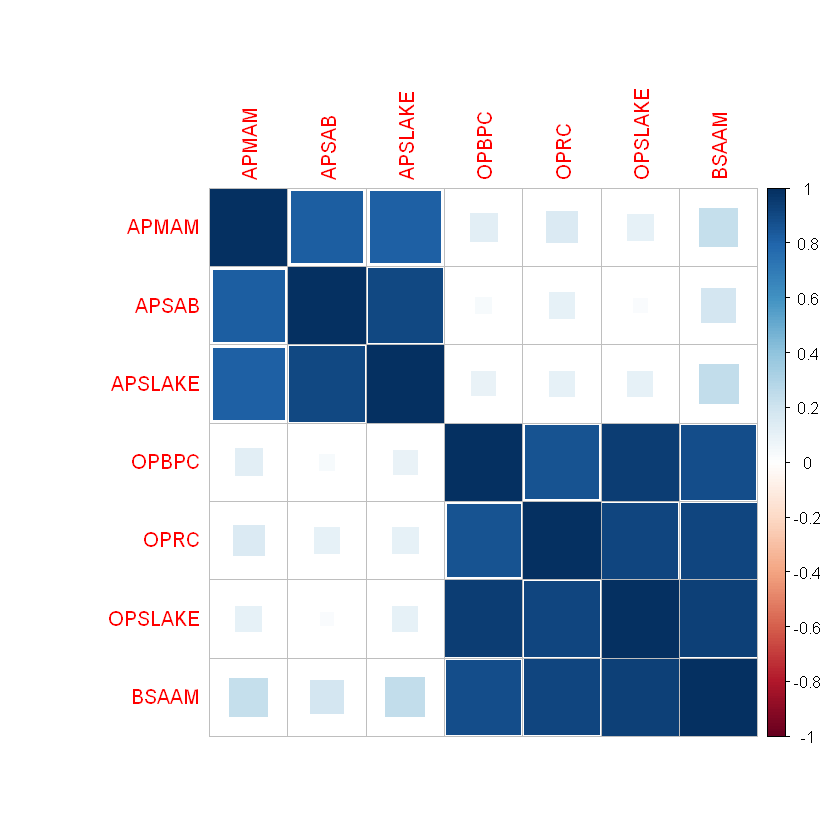

In [9]:
# Plot the heatmap chart
# Note make the plot below, data must be converted as above first
corrplot::corrplot(calif.cor, method = 'square') 

In [10]:
# We now scale the dataset
calif.water <- scale(calif.water)
calif.water <- data.frame(calif.water)
head(calif.water)

APMAM,APSAB,APSLAKE,OPBPC,OPRC,OPSLAKE,BSAAM
0.58334270,-0.52251850,-0.451872301,-1.1363134,-0.90919857,-1.1050204,-0.9217105
-0.65954512,0.08170372,0.119352780,-0.6875657,-0.17732563,-0.5111503,-0.3992744
-1.00819937,-0.42993607,-0.558146734,-0.4313242,0.03945195,-0.3403539,-0.4543708
-0.87906817,-0.09371564,-0.443016098,-0.2206078,0.62614357,-0.3748265,-0.3786230
-0.05585675,0.16454064,-0.022346465,0.4557656,1.60064829,1.4553589,1.1491069
0.76735466,0.48614279,-0.009062161,-0.5145701,-0.76600604,-0.9577280,-0.3982163


## Build the model

In [13]:
# The model building process is a bit different, notice that
# the independent variable are stored in the x object while the dependent varibale is 
# stored in y
x <- model.matrix(BSAAM~.-1, data = calif.water)
y <- calif.water$BSAAM

In [12]:
# This code is optional, however, if you want to see results
# in full rather than scientific format, use it
options(scipen=234)

### Ridge Regression (alpha = 0)

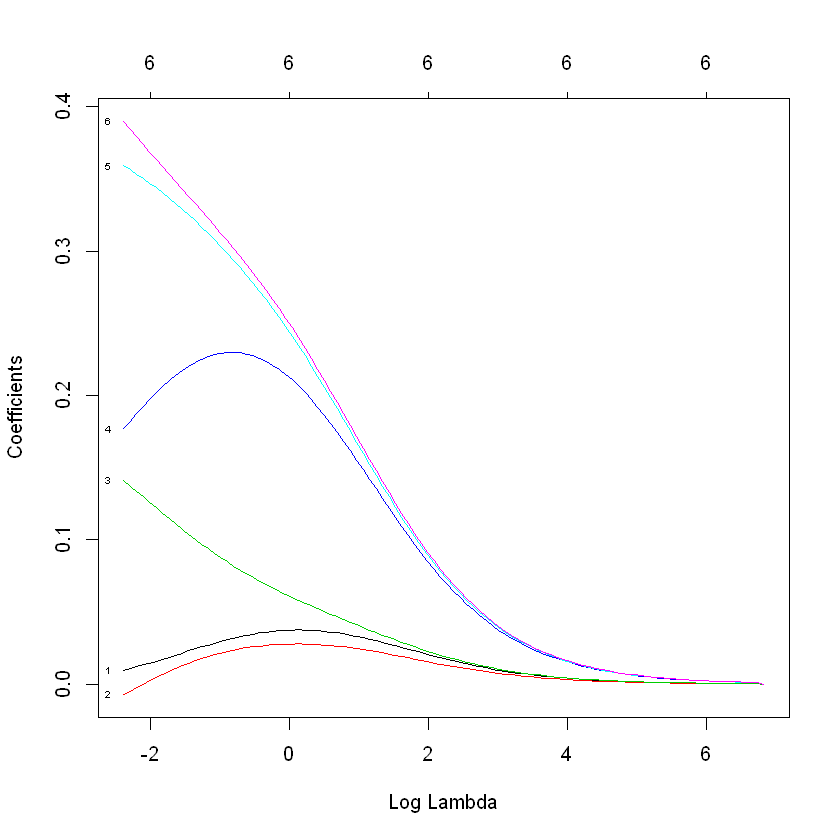

In [14]:
# Let us now build the ridge regression, notice that alpha is set to 0
set.seed(123) # this is for reproducibility (so you get extactly what i have here)
ridge <- glmnet(x,y, alpha=0)

# plot the model
plot(ridge, xvar="lambda", label=T)

From the plot above, the number of colored lines represent the six features from our dataset. Notice that as the value of lamda increases the bottom numbers, the lines shrink to near zero and all six features are retained (the top values on the chart). The vertical values are the coefficients of the features.

In [15]:
# Lets run again the ridge modeL but this time with a cross validation in it(cv)
cv.ridge <- cv.glmnet(x,y,alpha=0)

# To confirm what we have already learned in theory, the code below list all the coefficients
# notice how small they are but not zero
coef(cv.ridge)

7 x 1 sparse Matrix of class "dgCMatrix"
                                     1
(Intercept) -0.00000000000000007336965
APMAM        0.03289673614335679452392
APSAB        0.02436925702220284900568
APSLAKE      0.07903322563980051673749
OPBPC        0.22952846622475525650842
OPRC         0.28846911133693564632807
OPSLAKE      0.29621038320080034234039

In [16]:
# so for this case, the best value of lamda to choose is obtained
# by running the code below.
bestlamRidge <- cv.ridge$lambda.min
bestlamRidge

[1] 0.09274598

### LASSO Regression (alpha = 1)

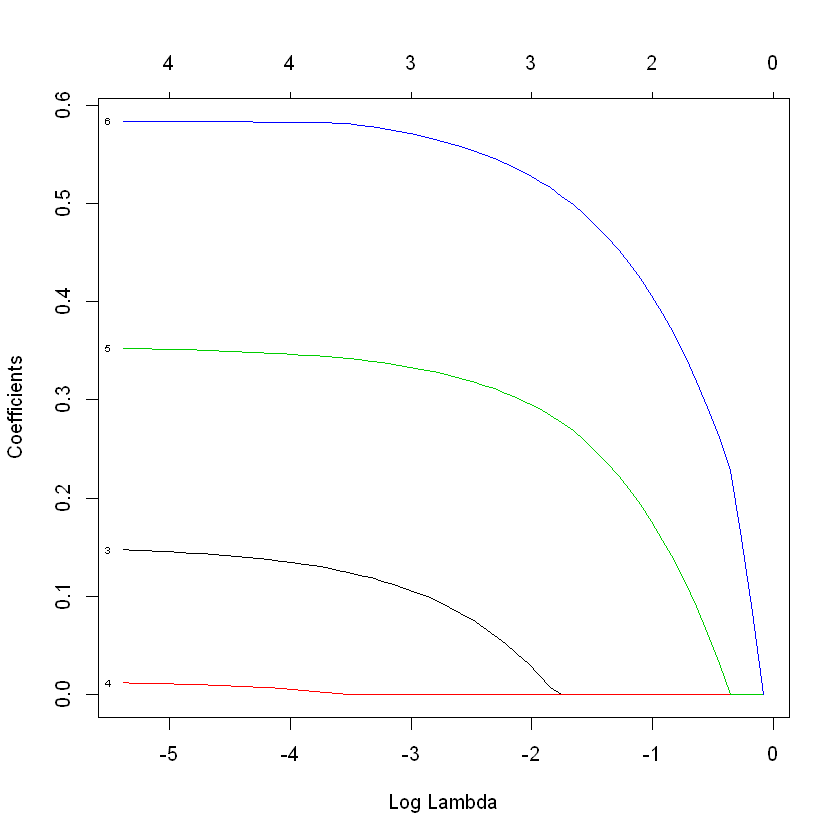

In [17]:
# Let us now build the LASSO regression, notice that alpha is set to 1
set.seed(123) # this is for reproducibility (so you get extactly what i have here)
lasso <- glmnet(x,y, alpha=1)

# plot the model
plot(lasso, xvar="lambda", label=T)

From the plot above, the number of colored lines represent the features from our dataset. Notice that as the value of lamda increases, i.e, the bottom numbers, the lines shrink to zero, as we can observed, the colored lines are fewer that we saw in Ridge regression.Again as lambda increases, the number of features drops (the top values on the chart). The vertical values are the coefficients of the features. So the big question now is what is the best value of lambda?

In [18]:
# Lets run again the LASSO modeL but this time with a cross validation in it(cv)
cv.lasso <- cv.glmnet(x,y,alpha=1)

# From the output below, we see that some features are now zero (APMAM ,APSAB and OPBPC )
coef(cv.lasso)

7 x 1 sparse Matrix of class "dgCMatrix"
                                     1
(Intercept) -0.00000000000000006644035
APMAM        .                        
APSAB        .                        
APSLAKE      0.06878557924849129645573
OPBPC        .                        
OPRC         0.31514789891943884025949
OPSLAKE      0.55016447531242040902555

In [19]:
# so for this case, the best value of lamda to choose is obtained
# by running the code below.
bestlamLasso <- cv.lasso$lambda.min
bestlamLasso

[1] 0.01170322

### Prediction

In [ ]:
# for prediction of out of sample dataset , uncomment the code below and plug in the data set in place of text_X
#pred_ridge <- predict(ridgeMod, s= bestlamLasso, newx=test_x)
#DMwR::regr.eval(testing$price, pred_ridge)

# pred_lasso <- predict(lassoMod, s= best_lambda, newx=test_x)
#DMwR::regr.eval(testing$price, pred_lasso)

What would the Elasticnet model be?
Investigate this and share with me or the class. God bless